# 7    | Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

## Datetime Basics

In [2]:
# use datetime to get current date
now = datetime.now()
now.year, now.month, now.day

(2021, 11, 2)

In [3]:
# use datetime to subtract two dates
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta.days

926

In [4]:
# timedelta can be used to add or subtract time
start = datetime(2011, 1, 7)
start, start + timedelta(12)

(datetime.datetime(2011, 1, 7, 0, 0), datetime.datetime(2011, 1, 19, 0, 0))

In [5]:
# convert datetime to str
stamp = datetime(2011, 1, 3)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [6]:
# convert str to datetime
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [7]:
# use list comprehension for multiple strings
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [8]:
# parse string in different framework
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [9]:
# to_datetime is a simple pandas function
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

## Time Series Basics

In [10]:
# create time series data
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.882575
2011-01-05    1.294062
2011-01-07    0.055875
2011-01-08    0.856292
2011-01-10   -1.327865
2011-01-12   -0.512056
dtype: float64

In [11]:
# subset value by index
stamp = ts.index[0]
ts[stamp]

0.8825750609092081

In [12]:
# drop rows after specified date
ts.truncate(after='1/9/2011')

2011-01-02    0.882575
2011-01-05    1.294062
2011-01-07    0.055875
2011-01-08    0.856292
dtype: float64

In [13]:
# subset all data by month
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.235198,0.057375,0.978857,0.003383
2001-05-09,-0.253198,-1.711520,-1.592157,-0.492806
2001-05-16,0.858420,-0.301669,-0.219322,0.419011
2001-05-23,0.409246,0.162544,0.161167,1.169585
2001-05-30,1.282460,1.554585,-1.138186,2.086900


In [14]:
# create data with duplicate indices
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [15]:
# count duplicated indices
grouped = dup_ts.groupby(level=0)
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [16]:
# generate date ranges
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [17]:
# generate data but from start or end with specified periods
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# generate data with weekly frequency
pd.date_range('2000-01-01', '2000-12-01', freq='W')

DatetimeIndex(['2000-01-02', '2000-01-09', '2000-01-16', '2000-01-23',
               '2000-01-30', '2000-02-06', '2000-02-13', '2000-02-20',
               '2000-02-27', '2000-03-05', '2000-03-12', '2000-03-19',
               '2000-03-26', '2000-04-02', '2000-04-09', '2000-04-16',
               '2000-04-23', '2000-04-30', '2000-05-07', '2000-05-14',
               '2000-05-21', '2000-05-28', '2000-06-04', '2000-06-11',
               '2000-06-18', '2000-06-25', '2000-07-02', '2000-07-09',
               '2000-07-16', '2000-07-23', '2000-07-30', '2000-08-06',
               '2000-08-13', '2000-08-20', '2000-08-27', '2000-09-03',
               '2000-09-10', '2000-09-17', '2000-09-24', '2000-10-01',
               '2000-10-08', '2000-10-15', '2000-10-22', '2000-10-29',
               '2000-11-05', '2000-11-12', '2000-11-19', '2000-11-26'],
              dtype='datetime64[ns]', freq='W-SUN')

### Shifting (Leading and Lagging) Data

In [19]:
# create random data 
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.310495
2000-02-29    0.560961
2000-03-31   -1.736056
2000-04-30   -0.191915
Freq: M, dtype: float64

In [20]:
# shift values forward
ts.shift(1)

2000-01-31         NaN
2000-02-29   -1.310495
2000-03-31    0.560961
2000-04-30   -1.736056
Freq: M, dtype: float64

ts / ts.shift(1) - 1

In [21]:
# shift indices backwards by month
ts.shift(-1, freq='M')

1999-12-31   -1.310495
2000-01-31    0.560961
2000-02-29   -1.736056
2000-03-31   -0.191915
Freq: M, dtype: float64

## Periods and Period Arithmetic

In [22]:
# alternatively create period variable 
p = pd.Period(2007, freq='Y')
p - 2

Period('2005', 'A-DEC')

In [23]:
# return first month of a year period
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

### Upsampling and Interpolation

In [24]:
# resample by adding days to df
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.774440,-0.941353,2.658411,-1.112699
2000-01-12,-1.998198,1.133114,0.708709,0.255897


In [25]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.774440,-0.941353,2.658411,-1.112699
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.998198,1.133114,0.708709,0.255897


In [26]:
# forward fill next two rows with previous values
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.774440,-0.941353,2.658411,-1.112699
2000-01-06,-0.774440,-0.941353,2.658411,-1.112699
2000-01-07,-0.774440,-0.941353,2.658411,-1.112699
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.998198,1.133114,0.708709,0.255897


## Moving Window Functions

In [27]:
# read csv
close_px_all = pd.read_csv('data/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


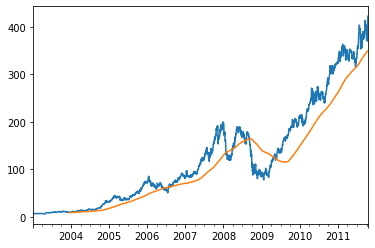

In [28]:
# plot sample and rolling mean
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

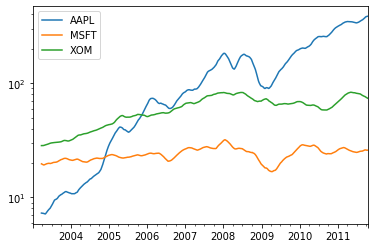

In [29]:
# plot rolling average for column
close_px.rolling(60).mean().plot(logy=True)

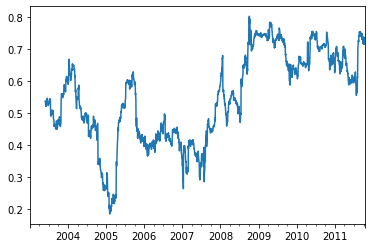

In [30]:
# plot correlation between percentage and returns for specific column
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

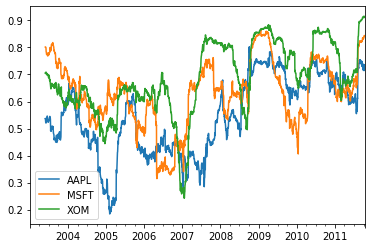

In [31]:
# plot corr for all columns
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()